[View in Colaboratory](https://colab.research.google.com/github/zecchinnicola/datasharing/blob/master/DataAnalysis_201808.ipynb)

In [0]:
import pandas as pd
import numpy as np
import os
import csv

In [3]:
# Load the file from local

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving AHDT_MAIO_v1.csv to AHDT_MAIO_v1.csv
User uploaded file "AHDT_MAIO_v1.csv" with length 30880 bytes


In [0]:
# Acquire csv as DataFrame from local dir
csv_path = cwd + "/AHDT_MAIO_v1.csv"
df = pd.read_csv(csv_path, sep=';')

In [6]:
# Let's visualise the dataset
df.head()

,id,c1,x2,c3,c4,x5,x6,x7,c8,TG
0,1,"0,196",563,1158,12755,899,869,86$,EL,390
1,2,"0,076",398,1704,15186,998,650,10$,LUX,133
2,3,"0,282",835,1790,10959,826,796,61$,CRO,395
3,4,"0,544",196,764,11940,716,564,57$,UGA,311
4,5,"0,038",298,1635,19877,980,761,08$,REU,93


# DATA PREPARATION

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
id    700 non-null int64
c1    700 non-null object
x2    700 non-null int64
c3    700 non-null int64
c4    700 non-null int64
x5    700 non-null int64
x6    700 non-null int64
x7    700 non-null object
c8    700 non-null object
TG    700 non-null int64
dtypes: int64(7), object(3)
memory usage: 54.8+ KB


##Data Cleansing

In [0]:
#Remove $ from column x7
df.x7 = df.x7.apply(lambda x: x.strip('$'))

In [9]:
df.head()

,id,c1,x2,c3,c4,x5,x6,x7,c8,TG
0,1,"0,196",563,1158,12755,899,869,86,EL,390
1,2,"0,076",398,1704,15186,998,650,10,LUX,133
2,3,"0,282",835,1790,10959,826,796,61,CRO,395
3,4,"0,544",196,764,11940,716,564,57,UGA,311
4,5,"0,038",298,1635,19877,980,761,08,REU,93


In [0]:
#Remove starting 0 from column x7
xx = df.x7.apply(lambda x: x.strip('0') if x.startswith('0') else x)

In [28]:
#xx_int = pd.to_numeric(xx, errors='coerce')
#nmb = xx_int[np.isnan(xx_int)]
#nmb

133   NaN
190   NaN
388   NaN
418   NaN
490   NaN
533   NaN
577   NaN
628   NaN
Name: x7, dtype: float64

In [0]:
#Transform x7 float64 into integer (where not NaN) 
xx_int = pd.to_numeric(xx, errors='coerce')
xx_int = xx_int.fillna(0.0).astype(int)
df.x7 = xx_int

In [32]:
#nmb = xx_int[np.isnan(xx_int)]
#nmb

Series([], Name: x7, dtype: int64)

In [12]:
# Clean column c1: replace ',' with '.' and cast to string on the fly
df.c1 = df.c1.str.replace(',','.')
# Cast column c1 to numeric value
df.c1 = pd.to_numeric(df.c1, errors='coerce')
df.head()

,id,c1,x2,c3,c4,x5,x6,x7,c8,TG
0,1,0.196,563,1158,12755,899,869,86,EL,390
1,2,0.076,398,1704,15186,998,650,10,LUX,133
2,3,0.282,835,1790,10959,826,796,61,CRO,395
3,4,0.544,196,764,11940,716,564,57,UGA,311
4,5,0.038,298,1635,19877,980,761,8,REU,93


### Transform column c8 from string to categorical number

In [21]:
# Column c8 is clearly categorical
#print("" + str(df.c8.nunique())
c8_cat = df.c8.unique()
print("Total records of the dataframe: " + str(len(df)))
print("Distinct values on column c8: " + str(df.c8.nunique()))

Total records of the dataframe: 700
Distinct values on column c8: 184


In [22]:
# Dictionary where category is key, category_number is value
dic = {}
i = 0
for cat in c8_cat:
  dic.update({cat:i})
  i = i + 1

c8 = df.c8

i = 0
for cat in c8:
  catnum = dic.get(cat)
  #df = df.append({'x7':catnum}, ignore_index=True)
  df.c8[i] = catnum
  i = i + 1

  
# Transform c8 Python object into integer
df.c8 = df.c8.astype(str).astype(int)
df.c8.head()

df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,id,c1,x2,c3,c4,x5,x6,x7,c8,TG
0,1,0.196,563,1158,12755,899,869,86,0,390
1,2,0.076,398,1704,15186,998,650,10,1,133
2,3,0.282,835,1790,10959,826,796,61,2,395
3,4,0.544,196,764,11940,716,564,57,3,311
4,5,0.038,298,1635,19877,980,761,8,4,93


In [23]:
# Drop column 'id'
df = df.drop('id', 1)
df.head()

,c1,x2,c3,c4,x5,x6,x7,c8,TG
0,0.196,563,1158,12755,899,869,86,0,390
1,0.076,398,1704,15186,998,650,10,1,133
2,0.282,835,1790,10959,826,796,61,2,395
3,0.544,196,764,11940,716,564,57,3,311
4,0.038,298,1635,19877,980,761,8,4,93


### Feature Scaling

In [24]:
# Multiply column c1 by 1000
df.c1 = df.c1 * 1000

# Transform c1 float64 into integer (where not NaN) 
df.c1 = df.c1.fillna(0.0).astype(int)

df.head()

,c1,x2,c3,c4,x5,x6,x7,c8,TG
0,196,563,1158,12755,899,869,86,0,390
1,76,398,1704,15186,998,650,10,1,133
2,282,835,1790,10959,826,796,61,2,395
3,544,196,764,11940,716,564,57,3,311
4,38,298,1635,19877,980,761,8,4,93


### Missing Values

In [25]:
print("Nulls in c1: " + str(df.c1.isnull().values.sum()))
print("Nulls in x2: " + str(df.x2.isnull().values.sum()))
print("Nulls in c3: " + str(df.c3.isnull().values.sum()))
print("Nulls in c4: " + str(df.c4.isnull().values.sum()))
print("Nulls in x5: " + str(df.x5.isnull().values.sum()))
print("Nulls in x6: " + str(df.x6.isnull().values.sum()))
print("Nulls in x7: " + str(df.x7.isnull().values.sum()))
print("Nulls in c8: " + str(df.c8.isnull().values.sum()))
print("Nulls in TG: " + str(df.TG.isnull().values.sum()))

Nulls in c1: 0
Nulls in x2: 0
Nulls in c3: 0
Nulls in c4: 0
Nulls in x5: 0
Nulls in x6: 0
Nulls in x7: 0
Nulls in c8: 0
Nulls in TG: 0


There are no missing values (that could be fulfilled with the mean of the feature)

# DATA EXPLORATION

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

Let's check how the TG values are distributed

count    700.000000
mean     319.787143
std      219.368098
min        1.000000
25%      132.750000
50%      277.000000
75%      475.000000
max      976.000000
Name: TG, dtype: float64


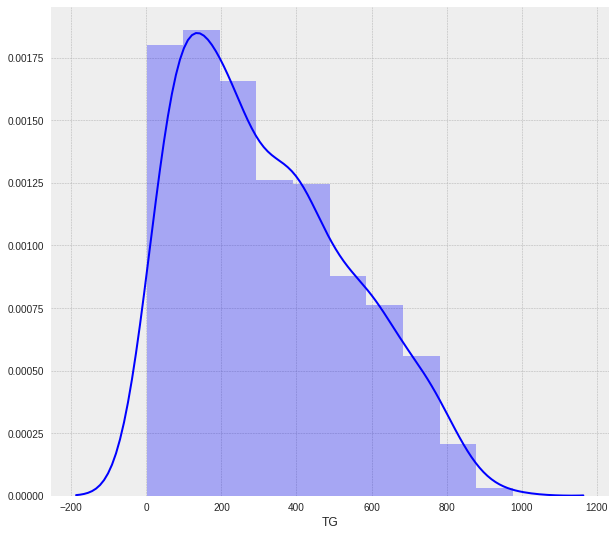

In [27]:
print(df.TG.describe())
plt.figure(figsize=(10, 9))
sns.distplot(df.TG, color='b', bins=10, hist_kws={'alpha': 0.3});

The values have an evident positive skew (positive direction).<br>
It seems that there are no outliers in the TG values.

### Numerical Distribution

Let's plot an histogram for each feature (excluding object feature TG)

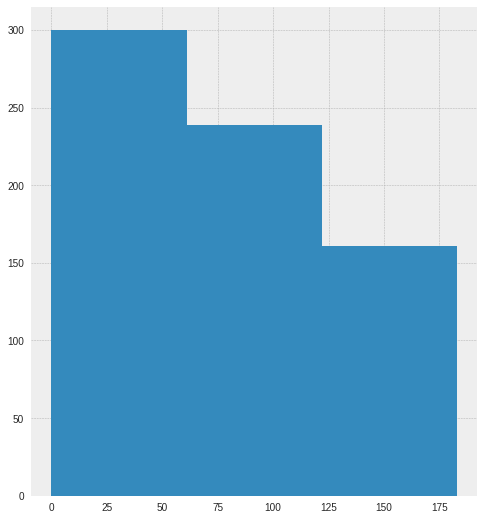

In [28]:
# Let's treat categorical feature separately
c8 = df.c8
c8.hist(figsize=(8, 9), bins=3, xlabelsize=10, ylabelsize=10);

This categorical feature named c8 seems to be equally distributed.<br>
There are no other quantitative observations on it, except that it could probably be grouped by geographical area

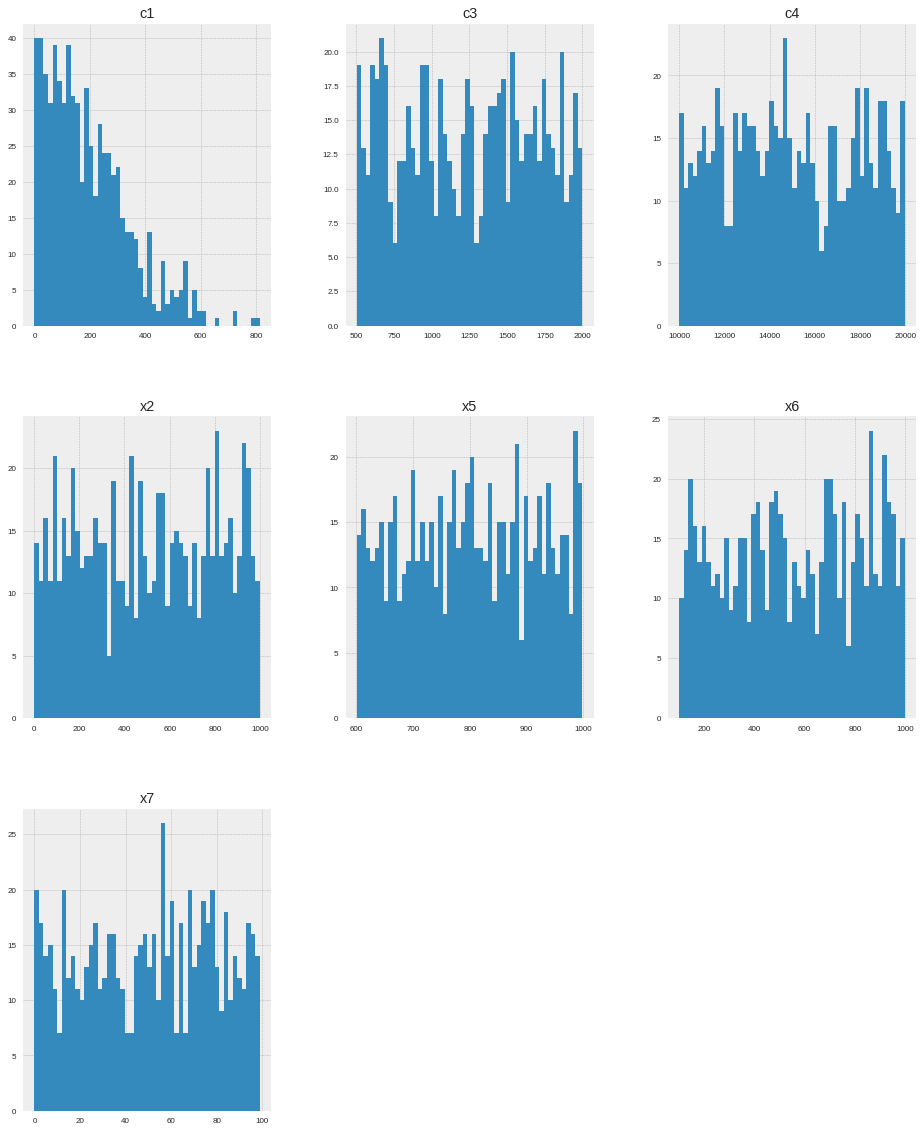

In [29]:
df_fea = df.drop('TG', 1)
df_fea = df_fea.drop('c8', 1)
df_fea.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

No outliers seem to be present in the numerical distribution of single features

###Correlation

Let's see whether some features are correlated with the TG object column

In [30]:
# Obviously we remove the TG column
# df_fea_corr = df.drop('TG', 1)

# Let's use Pearson correlation
df_num_corr = df.corr(method='pearson')['TG'][:-1] # -1 because the latest row will be TG itself
# Let's write them in descending order and consider only where Pearson's r > 0.6
corr_fea_list = df_num_corr[abs(df_num_corr) > 0.6].sort_values(ascending=False)
print(corr_fea_list)

Series([], Name: TG, dtype: float64)


We have assumed a value > .6 to be noteworthy.<br> 
There are no correlated features.<br>
Anyway some other relationship can be highlighted using different metrics (for instance, curvilinear correlation)

# MODELLING

### Train/Test Split

In [0]:
# Let's apply a 80/20 split

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, shuffle=False)

X_train = df_train.drop('TG', 1)
y_train = df_train.TG

X_test = df_test.drop('TG',1)
y_test = df_test.TG

### Define Error Measure

In [0]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer

#scorer = make_scorer(mean_squared_error, greater_is_better = False)
#scorer = make_scorer(mean_squared_error, greater_is_better = False)
# True = score function
# False = loss function
#def rmse_cv(model, X_vals, y_vals):
  #rmse = np.sqrt(-cross_val_score(model, X_vals, y_vals, scoring = scorer, cv = 10))
  #rmse = np.sqrt(-cross_val_score(model, X_vals, y_vals, scoring = scorer))
  #return rmse

#scorer = make_scorer(mean_absolute_error)
#def mae_cv(model, X_vals, y_vals):
  #mae = np.sqrt(-cross_val_score(model, X_vals, y_vals, scoring = scorer))
  #return mae

# Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression(normalize=True)

linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [34]:
# Look at predictions on training and validation set

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

print("Train Mean Absolute Error : " + str(mean_absolute_error(y_train_pred, y_train)))
print("Train Mean Squared Error : " + str(mean_squared_error(y_train_pred, y_train)))
print("Test Mean Absolute Error : " + str(mean_absolute_error(y_test_pred, y_test)))
print("Test Mean Squared Error : " + str(mean_squared_error(y_test_pred, y_test)))

Train Mean Absolute Error : 183.3638998928972
Train Mean Squared Error : 46425.32359115661
Test Mean Absolute Error : 177.04943350317203
Test Mean Squared Error : 44268.17060614393


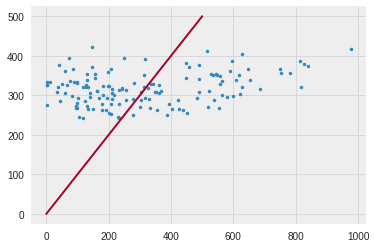

In [35]:
# plot prediction and actual data 
plt.plot(y_test, y_test_pred, '.')
# plot a line, a perfect prediction would fall along this line
x = np.linspace(0, 500, 100)
y = x
plt.plot(x, y)
plt.show()

### Residual Histogram

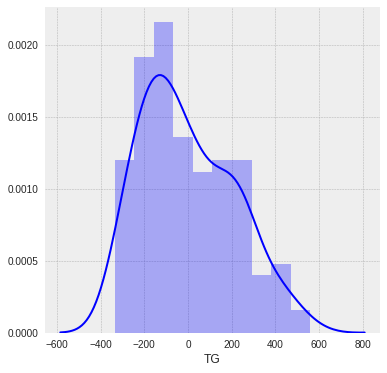

In [36]:
plt.figure(figsize=(6, 6))
sns.distplot((y_test-y_test_pred), color='b', bins=10, hist_kws={'alpha': 0.3});

### Residual vs Fitted values

Text(0.5,1,'Residual plot')

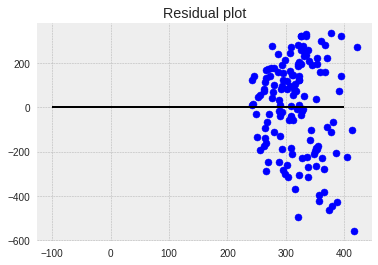

In [38]:
x_plot = plt.scatter(y_test_pred, (y_test_pred - y_test), c='b')

plt.hlines(y = 0, xmin = -100, xmax = 400)

plt.title('Residual plot')

### Checking the magnitude of the coefficients

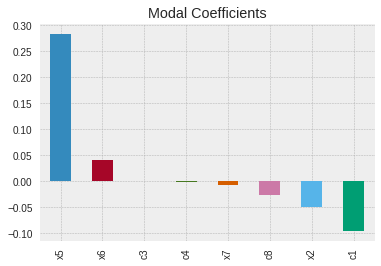

In [39]:
predictors = X_train.columns

coef = pd.Series(linreg.coef_, predictors).sort_values(ascending=False)


coef.plot(kind='bar', title='Modal Coefficients')

x5 has a significative coefficient that can be regularized

# Regularization on Linear Regression

## Ridge Regression: L2 Regularization

In [0]:
from sklearn.linear_model import Ridge

Mean Absolute Error : 177.20639005643778
Mean Squared Error : 44329.336559380834


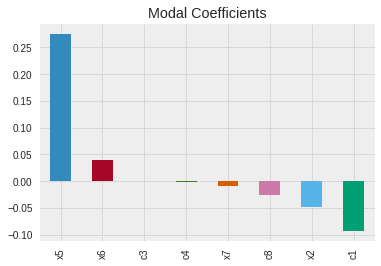

In [41]:
# Tried with the following values
# alphas = [0.03, 0.3, 3]

ridgeReg = Ridge(alpha = 0.03, normalize = True)

ridgeReg.fit(X_train, y_train)

pred_y = ridgeReg.predict(X_test)


predictors = X_train.columns
coef = pd.Series(ridgeReg.coef_, predictors).sort_values(ascending=False)
coef.plot(kind='bar', title='Modal Coefficients')

print("Mean Absolute Error : " + str(mean_absolute_error(pred_y, y_test)))
print("Mean Squared Error : " + str(mean_squared_error(pred_y, y_test)))

## Lasso Regression:  L1 Regularization


In [0]:
from sklearn.linear_model import Lasso

Mean Absolute Error : 177.2222880336101
Mean Squared Error : 44303.605549417356


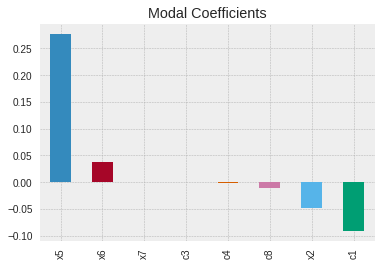

In [43]:
# Tried with the following values
# alphas = [0.03, 0.3, 3]

lassoReg = Lasso(alpha = 0.03, normalize = True)

lassoReg.fit(X_train, y_train)

pred_y = lassoReg.predict(X_test)


predictors = X_train.columns
coef = pd.Series(lassoReg.coef_, predictors).sort_values(ascending=False)
coef.plot(kind='bar', title='Modal Coefficients')

print("Mean Absolute Error : " + str(mean_absolute_error(pred_y, y_test)))
print("Mean Squared Error : " + str(mean_squared_error(pred_y, y_test)))

# Elastic Net Regression

In [0]:
from sklearn.linear_model import ElasticNet

In [297]:
ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENreg.fit(X_train, y_train)

pred_ENreg_y = ENreg.predict(X_test)


print("Mean Absolute Error : " + str(mean_absolute_error(pred_ENreg_y, y_test)))
print("Mean Squared Error : " + str(mean_squared_error(pred_ENreg_y, y_test)))

Mean Absolute Error : 177.05146902744497
Mean Squared Error : 44268.53755856587


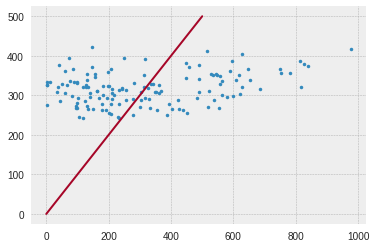

In [307]:
# plot prediction and actual data 
plt.plot(y_test, pred_ENreg_y, '.')
# plot a line, a perfect prediction would all fall on this line
x = np.linspace(0, 500, 100)
y = x
plt.plot(x, y)
plt.show()

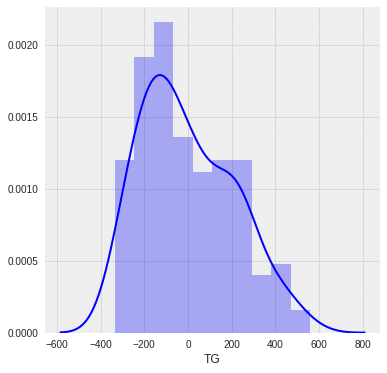

In [308]:
plt.figure(figsize=(6, 6))
sns.distplot((y_test-pred_ENreg_y), color='b', bins=10, hist_kws={'alpha': 0.3});

# Polynomial Regression

In [0]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

Let's try 2nd degree polynom

In [61]:
polyReg2 = PolynomialFeatures(degree=2)

X_poly = polyReg2.fit_transform(X_train)

y_poly = polyReg2.fit_transform(X_test)


linReg2 = linear_model.LinearRegression()

linReg2.fit(X_poly, y_train)

y_test_pred_d2 = linReg2.predict(y_poly)

print("Mean Absolute Error : " + str(mean_absolute_error(y_test_pred_d2, y_test)))
print("Mean Squared Error : " + str(mean_squared_error(y_test_pred_d2, y_test)))

Mean Absolute Error : 177.17373006317897
Mean Squared Error : 47528.869303385436


3rd degree

In [62]:
polyReg3 = PolynomialFeatures(degree=3)

X_poly = polyReg3.fit_transform(X_train)

y_poly = polyReg3.fit_transform(X_test)


linReg3 = linear_model.LinearRegression()

linReg3.fit(X_poly, y_train)

y_test_pred_d3 = linReg3.predict(y_poly)

print("Mean Absolute Error : " + str(mean_absolute_error(y_test_pred_d3, y_test)))
print("Mean Squared Error : " + str(mean_squared_error(y_test_pred_d3, y_test)))

Mean Absolute Error : 215.73149993783986
Mean Squared Error : 72685.08761266756


A 3rd degree of complexity doesn't help to fit

## Regularization on Polynomial Regression

## Ridge Regression: L2 Regularization

In [0]:
from sklearn.linear_model import Ridge

In [67]:
polyReg2 = PolynomialFeatures(degree=2)

X_poly = polyReg2.fit_transform(X_train)

y_poly = polyReg2.fit_transform(X_test)

ridgeReg2 = Ridge(alpha = 0.01, normalize = True)

ridgeReg2.fit(X_poly, y_train)

y_test_pred_d2_rid = ridgeReg2.predict(y_poly)

print("Mean Absolute Error : " + str(mean_absolute_error(y_test_pred_d2_rid, y_test)))
print("Mean Squared Error : " + str(mean_squared_error(y_test_pred_d2_rid, y_test)))

Mean Absolute Error : 175.89430021268512
Mean Squared Error : 45701.429059846356


## Lasso Regression: L1 Regularization

In [0]:
from sklearn.linear_model import Lasso

In [72]:
polyReg2 = PolynomialFeatures(degree=2)

X_poly = polyReg2.fit_transform(X_train)

y_poly = polyReg2.fit_transform(X_test)

lassoReg2 = Lasso(alpha = 0.03, normalize = True)

lassoReg2.fit(X_poly, y_train)

y_test_pred_d2_las = lassoReg2.predict(y_poly)


print("Mean Absolute Error : " + str(mean_absolute_error(y_test_pred_d2_las, y_test)))
print("Mean Squared Error : " + str(mean_squared_error(y_test_pred_d2_las, y_test)))

Mean Absolute Error : 176.8357650881022
Mean Squared Error : 45593.27431594827


#XGBoost

In [0]:
import xgboost as xgb

In [251]:
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [252]:
predictions = model_xgb.predict(X_test)

print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))
print("Mean Squared Error : " + str(mean_squared_error(predictions, y_test)))

Mean Absolute Error : 187.08080340794154
Mean Squared Error : 49412.424090929526


### XGB Model Tuning

### n_estimators

In [255]:
model_xgb = xgb.XGBRegressor(n_estimators=150)
#model_xgb.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_train, y_train)], verbose=False)
model_xgb.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [256]:
predictions = model_xgb.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))
print("Mean Squared Error : " + str(mean_squared_error(predictions, y_test)))

Mean Absolute Error : 187.85382020132883
Mean Squared Error : 49673.12141584673


### Learning Rate

In [257]:
model_xgb = xgb.XGBRegressor(n_estimators=150, learning_rate=0.01)
model_xgb.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [258]:
predictions = model_xgb.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))
print("Mean Squared Error : " + str(mean_squared_error(predictions, y_test)))

Mean Absolute Error : 175.03986958095007
Mean Squared Error : 50064.98815125081


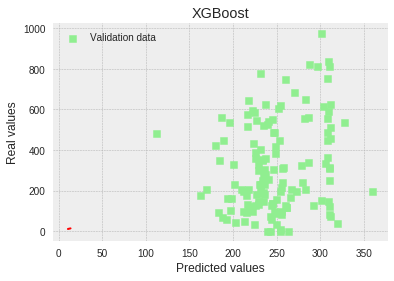

In [236]:
# Plot predictions
plt.scatter(predictions, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("XGBoost")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

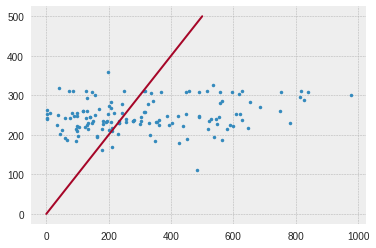

In [259]:
# plot prediction and actual data 
plt.plot(y_test, predictions, '.')
# plot a line, a perfect prediction would all fall on this line
x = np.linspace(0, 500, 100)
y = x
plt.plot(x, y)
plt.show()

### Residual Histogram

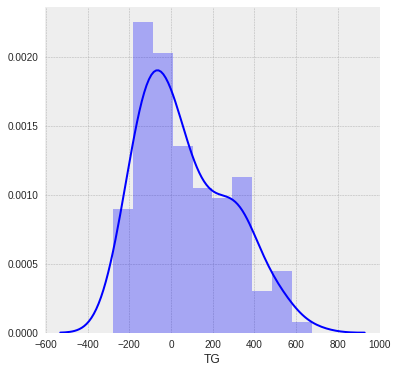

In [302]:
plt.figure(figsize=(6, 6))
sns.distplot((y_test-predictions), color='b', bins=10, hist_kws={'alpha': 0.3});

# Support Vector Regression

In [0]:
from sklearn.svm import SVR

Let's try a RBF kernel

In [78]:
svrRBFReg = SVR(kernel = 'rbf')

y_test_pred_rbf = svrRBFReg.fit(X_train, y_train).predict(X_test)

print("Mean Absolute Error : " + str(mean_absolute_error(y_test_pred_rbf, y_test)))
print("Mean Squared Error : " + str(mean_squared_error(y_test_pred_rbf, y_test)))

Mean Absolute Error : 180.4142857142857
Mean Squared Error : 49101.93571428571
